# COVID-19 Pandemic Analysis Project. 

# Data Citation
#### http://covidtracking.com/api/states/daily.csv (Getting first data)
#### https://covid.ourworldindata.org/data/owid-covid-data.csv (Getting second dataset for lockdown analysis)
#### https://github.com/altair-viz/altair (Documnetation of altair library)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import pandas as pd
from scipy.stats import norm
import scipy.stats as st
# if using a Jupyter notebook, inlcude:
%matplotlib inline

### Importing altair to use more statistical visulaization
# Github repository Citation: https://github.com/altair-viz/altair
###
import altair as alt



In [2]:
#####
#Importing data here from csv file using API key
####
data = pd.read_csv('http://covidtracking.com/api/states/daily.csv', parse_dates = ['date'])
data.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,10194.000000,1.005300e+04,1214.000000,7525.000000,5703.000000,4087.000000,1593.000000,3501.000000,562.000000,6758.000000,...,10290.000000,1.029000e+04,10290.000000,10290.000000,10290.0,10290.0,10290.0,10290.0,10290.0,0.0
mean,41753.771925,4.428563e+05,1146.981054,931.536877,6115.384359,342.518963,927.279347,152.735504,255.366548,19061.546907,...,7811.379689,4.740207e+05,17.370457,36.481633,0.0,0.0,0.0,0.0,0.0,NaN
std,85171.901228,9.512946e+05,5569.132112,1779.491384,14107.862596,607.164959,852.537070,247.529190,180.082475,39206.760934,...,15339.785938,1.019474e+06,48.904468,249.656096,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,...,-194215.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,1071.500000,2.044300e+04,18.000000,95.000000,410.500000,58.000000,256.000000,25.000000,123.000000,1001.000000,...,431.000000,1.857275e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,9989.000000,1.276790e+05,150.000000,382.000000,1856.000000,139.000000,695.000000,81.000000,195.000000,4807.000000,...,2733.500000,1.333950e+05,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,45060.250000,4.566520e+05,485.750000,930.000000,5895.500000,321.000000,1335.000000,164.000000,329.000000,22683.000000,...,8546.000000,4.927878e+05,14.000000,22.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,717177.000000,1.094675e+07,64400.000000,18825.000000,89995.000000,5225.000000,4628.000000,2425.000000,827.000000,527359.000000,...,187926.000000,1.166392e+07,951.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
data.info

<bound method DataFrame.info of             date state  positive   negative  pending  hospitalizedCurrently  \
0     2020-09-03    AK    6339.0   371597.0      NaN                   43.0   
1     2020-09-03    AL  129285.0   836689.0      NaN                  872.0   
2     2020-09-03    AR   63081.0   675337.0      NaN                  425.0   
3     2020-09-03    AS       0.0     1514.0      NaN                    NaN   
4     2020-09-03    AZ  203953.0  1018906.0      NaN                  745.0   
...          ...   ...       ...        ...      ...                    ...   
10285 2020-01-24    WA       0.0        0.0      NaN                    NaN   
10286 2020-01-23    MA       NaN        NaN      NaN                    NaN   
10287 2020-01-23    WA       0.0        0.0      NaN                    NaN   
10288 2020-01-22    MA       NaN        NaN      NaN                    NaN   
10289 2020-01-22    WA       0.0        0.0      NaN                    NaN   

       hospitalized

In [4]:
###
#Only focus on the USA
###
us = data[data['state'] == 'NY']
us.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,184.000000,1.840000e+02,4.000000,171.000000,167.000000,162.000000,0.0,120.000000,0.0,161.000000,...,184.000000,1.840000e+02,184.000000,184.000000,184.0,184.0,184.0,184.0,184.0,0.0
mean,303964.728261,2.681389e+06,130.000000,4886.906433,77350.502994,1477.111111,NaN,446.575000,NaN,59766.993789,...,46290.239130,2.985353e+06,137.733696,489.103261,0.0,0.0,0.0,0.0,0.0,NaN
std,144564.864368,2.511615e+06,122.398257,5778.998515,24002.552226,1711.756321,NaN,607.622736,NaN,19893.512651,...,26399.866752,2.621025e+06,218.712101,847.071539,0.0,0.0,0.0,0.0,0.0,NaN
min,6.000000,4.800000e+01,24.000000,325.000000,1531.000000,109.000000,NaN,47.000000,NaN,2045.000000,...,0.000000,5.400000e+01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,241272.500000,3.710268e+05,24.000000,647.000000,78583.000000,155.250000,NaN,69.000000,NaN,57540.000000,...,22396.250000,6.122992e+05,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,374609.000000,1.886644e+06,130.000000,1608.000000,89995.000000,484.500000,NaN,109.500000,NaN,68851.000000,...,51477.500000,2.261252e+06,20.500000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,406936.750000,4.720869e+06,236.000000,7295.000000,89995.000000,2478.500000,NaN,561.250000,NaN,72632.000000,...,67387.250000,5.127806e+06,169.500000,612.750000,0.0,0.0,0.0,0.0,0.0,NaN
max,437107.000000,8.080351e+06,236.000000,18825.000000,89995.000000,5225.000000,NaN,2425.000000,NaN,75255.000000,...,100022.000000,8.517458e+06,951.000000,3424.000000,0.0,0.0,0.0,0.0,0.0,NaN


# Ploting the total cases vs total death as bar chart to be able to visualize it
### Using altair; Altair is a declarative statistical visualization library for Python

In [5]:
purple = alt.value('#b5ff')
plot_total = alt.Chart(us).mark_bar().encode(x='monthdate(date):O',).properties(width=400)

In [6]:

plot_total.encode(y='positive').properties(title='Total positive cases per day')| plot_total.encode(y='negative').properties(title='Total Negative per day')

alt.HConcatChart(...)

In [7]:
plot_total.encode(y='posNeg').properties(title='Total positive to negative per day')| plot_total.encode(y='death').properties(title='Total death per day')

alt.HConcatChart(...)

In [96]:
#doing polynmial fits on positive and desthIncrease
x = us['positive']
y = us['totalTestResultsIncrease']

#converting them to DataFrame so it can exported as a col and rows
# this will be better for the fit
source = pd.DataFrame({'x':x,'y':y})

#define the degree and color of the poly fits
degree = [1,3,5]
color_list = ['#5276A7', '#f2', '#b45']

#####
# using alt air for better statistcal graph
####
fit = alt.Chart(source).mark_circle(color='black').encode(alt.X('x'),alt.Y('y'))

polyFit = (fit.transform_regression('x', 'y', method='poly', order=order)
               .mark_line(color=color) 
               for order, color in zip(degree, color_list))

alt.layer(fit, *polyFit).properties(title='Positive cases vs Total test result')


alt.LayerChart(...)

In [113]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = data[data['state']==state][vary]
    x = data[data['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='blue',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.savefig('totaltest vs positive cases.png')
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

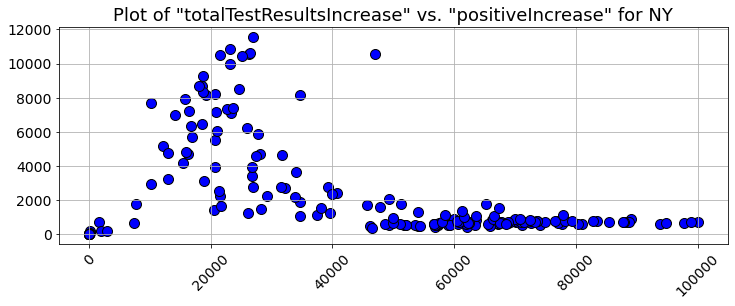

In [114]:
plot_xy(state='NY')

# Analysis using the day that the government announce the Isolation on the 18th of March.
### That will help us to see the new cases vs the total cases after being quarantined
#### I am separating the US data in different csv file to make it easier for me to do this analysis
#### As while I am doing the for loop i will face hard time to use the large file as it will take long time in running

In [81]:
lockdown = pd.read_csv('owid-covid-data.CSV')
lockdown.head()


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,USA,United States,3/7/20,338,105,14,2,1.021,0.317,0.042,0.006,2390.0,NaN,0.007,NaN,inconsistent units (COVID Tracking Project)
1,USA,United States,3/8/20,433,95,17,3,1.308,0.287,0.051,0.009,3069.0,679.0,0.009,0.002,inconsistent units (COVID Tracking Project)
2,USA,United States,3/9/20,554,121,21,4,1.674,0.366,0.063,0.012,4398.0,1329.0,0.013,0.004,inconsistent units (COVID Tracking Project)
3,USA,United States,3/10/20,754,200,26,5,2.278,0.604,0.079,0.015,5184.0,786.0,0.016,0.002,inconsistent units (COVID Tracking Project)
4,USA,United States,3/11/20,1025,271,28,2,3.097,0.819,0.085,0.006,7870.0,2686.0,0.024,0.008,inconsistent units (COVID Tracking Project)


In [82]:
tcases = lockdown['total_cases']
test = lockdown['new_tests']
lockdown.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,USA,United States,3/7/20,338,105,14,2,1.021,0.317,0.042,0.006,2390.0,NaN,0.007,NaN,inconsistent units (COVID Tracking Project)
1,USA,United States,3/8/20,433,95,17,3,1.308,0.287,0.051,0.009,3069.0,679.0,0.009,0.002,inconsistent units (COVID Tracking Project)
2,USA,United States,3/9/20,554,121,21,4,1.674,0.366,0.063,0.012,4398.0,1329.0,0.013,0.004,inconsistent units (COVID Tracking Project)
3,USA,United States,3/10/20,754,200,26,5,2.278,0.604,0.079,0.015,5184.0,786.0,0.016,0.002,inconsistent units (COVID Tracking Project)
4,USA,United States,3/11/20,1025,271,28,2,3.097,0.819,0.085,0.006,7870.0,2686.0,0.024,0.008,inconsistent units (COVID Tracking Project)


In [83]:
y = []
testgrowth = []

In [84]:
for i in range(1, len(test)):
    current = (tcases[i] - tcases[i-1])/(test[i] - test[i-1])*100
    testgrowth.append(test[i]-test[i-1])
    y.append(current)



In [85]:
x = []
for i in range(1, len(y)+1):
    x.append([i])

In [86]:
# I will make a vertical line here in order to show the start of the restriction laws that the USA made
# that will help us see the impact of this descision on the cases growth
day = 17
x_rest = [day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day]
y_rest = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

In [87]:
# I will make another vertical line here in order to the effection of the restrictions on the new
# cases after 14 days of the isolation
eff = day + 14
x_effect = [eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff]
y_effect = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]



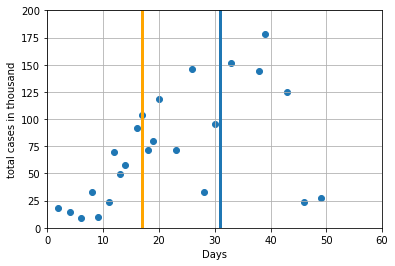

In [88]:
plt.scatter(x,y)
plt.plot(x_rest, y_rest, color = 'orange', linewidth = 3)
plt.plot(x_effect, y_effect, linewidth = 3)
plt.grid()
plt.xlabel('Days')
plt.ylabel("total cases in thousand")
plt.xlim(0,60)
plt.ylim(0,200)
plt.savefig("Qurantine Analysis.png")
plt.show()

# Function to plot the total tests happened and from thier we will conclude how that affect our data 

In [93]:
def CovidTest(lst_states=['NY','CT','UT','TX']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data1 = np.array(data[data['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data1[-1]-data1[0])/len(data1))
        plt.plot(data1,linewidth=2)
        plt.text(x=len(data1)-2,y=data1[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data1)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.savefig("TestResultperstate.png")
    plt.show()

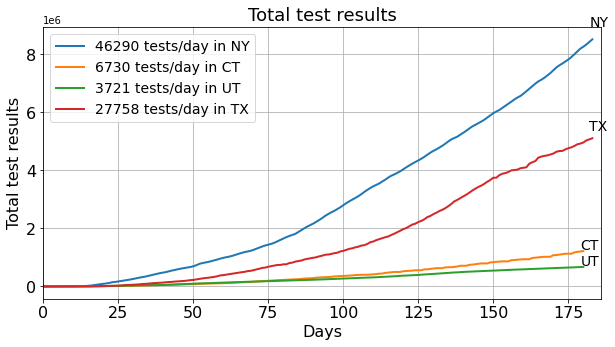

In [94]:
CovidTest()